In [ ]:
from __future__ import print_function
import numpy as np  
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# covert data to 4D to be able to execute later on
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# y label into one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#train validation split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=2)


#build model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

#compile and choose lost function, optimizer and metrics 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)


# train_history = model.fit(x_train, y_train,batch_size=128,epochs=13,verbose=1,validation_data=(x_test, y_test))
train_history = model.fit(datagen.flow(x_train,y_train, batch_size=128),epochs=13,verbose=1,validation_data=(x_val, y_val))


Epoch 1/13
422/422 [==============================] - 18s 42ms/step - loss: 0.3955 - accuracy: 0.8710 - val_loss: 0.0605 - val_accuracy: 0.9808
Epoch 2/13
422/422 [==============================] - 17s 41ms/step - loss: 0.1279 - accuracy: 0.9617 - val_loss: 0.0413 - val_accuracy: 0.9880
Epoch 3/13
422/422 [==============================] - 18s 42ms/step - loss: 0.0954 - accuracy: 0.9728 - val_loss: 0.0342 - val_accuracy: 0.9892
Epoch 4/13
422/422 [==============================] - 19s 45ms/step - loss: 0.0806 - accuracy: 0.9758 - val_loss: 0.0306 - val_accuracy: 0.9900
Epoch 5/13
422/422 [==============================] - 18s 42ms/step - loss: 0.0670 - accuracy: 0.9801 - val_loss: 0.0283 - val_accuracy: 0.9905
Epoch 6/13
422/422 [==============================] - 18s 42ms/step - loss: 0.0628 - accuracy: 0.9815 - val_loss: 0.0245 - val_accuracy: 0.9912
Epoch 7/13
422/422 [==============================] - 18s 42ms/step - loss: 0.0570 - accuracy: 0.9833 - val_loss: 0.0204 - val_accuracy:

In [ ]:
#plot function
from matplotlib import pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

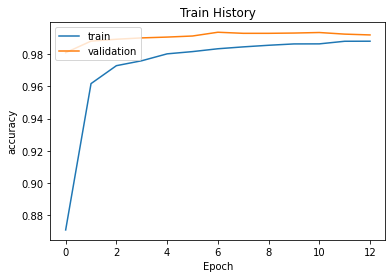

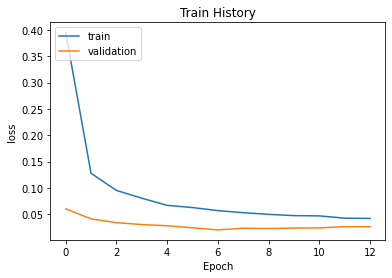

Test loss: 0.013447369448840618
Test accuracy: 0.9948999881744385


In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

#loss function and accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [84]:
import os
os.chdir('/content/drive/MyDrive/AI/digits')  # Colab 換路徑使用

from PIL import Image
img = Image.open('9.png').convert('L') #灰階圖片
img = img.resize((28,28)) 
img
im = np.array(img).astype('float32') 
im = (255-im)/255
im = im.reshape(28, 28)
im = np.expand_dims(im, 0)
np.argmax(model.predict(im))



1/1 [==============================] - 0s 76ms/step


9